<a href="https://colab.research.google.com/github/HHIR/CV_proj/blob/main/CV_Project_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation and YOLOv8 Installation

In [10]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
# Access Google drive & mounted.
import os
os.chdir("gdrive/MyDrive")

In [12]:
!cd ..

In [13]:
# Create YOLOv8 root folder
!mkdir YOLOv8_Optimization

In [14]:
# Go to YOLOv8 root folder
%cd YOLOv8_Optimization

/content/gdrive/MyDrive/YOLOv8_Optimization


In [15]:
# Install YOLOv8
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.3/235.7 GB disk)


# YOLOv8 Architecture

In [16]:
# Download the orginal YOLOv8 Architecture File
!wget https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/models/v8/yolov8.yaml

--2024-10-21 01:05:09--  https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/models/v8/yolov8.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889 (1.8K) [text/plain]
Saving to: ‘yolov8.yaml’

yolov8.yaml         100%[===================>]   1.84K  --.-KB/s    in 0.001s  

2024-10-21 01:05:09 (1.23 MB/s) - ‘yolov8.yaml’ saved [1889/1889]



In [17]:
# Create "YOLOv8l" Architecture.
!cp yolov8.yaml yolov8l.yaml

## Modified YOLOv8 Architecture for our dataset

In [18]:
# Download the YOLOv8l modified Architecture
!gdown https://drive.google.com/uc?id=1-GNXvdYi8aeVuJEkjY533xpZVZEH7Qjq


Downloading...
From: https://drive.google.com/uc?id=1-GNXvdYi8aeVuJEkjY533xpZVZEH7Qjq
To: /content/gdrive/MyDrive/YOLOv8_Optimization/Modify_YOLOv8.yaml
100% 1.89k/1.89k [00:00<00:00, 9.85MB/s]


### Download the dataset

In [19]:
# Create data root folder
!mkdir data
%cd data

/content/gdrive/MyDrive/YOLOv8_Optimization/data


In [20]:
# Download the dataset
!gdown https://drive.google.com/uc?id=127N48hqFMhfllwfP5zBuNsiU9rSttdH2

Downloading...
From: https://drive.google.com/uc?id=127N48hqFMhfllwfP5zBuNsiU9rSttdH2
To: /content/gdrive/MyDrive/YOLOv8_Optimization/data/CLEVR-Hans_dataset.zip
100% 2.03M/2.03M [00:00<00:00, 125MB/s]


In [ ]:
# Unzip Dataset
!unzip CLEVR-Hans_dataset.zip

### Download the data file link ro dorost konam


In [22]:
# Download the Yaml file for our dataset
!gdown https://drive.google.com/uc?id=1-HCTLQuNuINRQ7ZkQNYAhJta7HNp1YY2

Downloading...
From: https://drive.google.com/uc?id=1-HCTLQuNuINRQ7ZkQNYAhJta7HNp1YY2
To: /content/gdrive/MyDrive/YOLOv8_Optimization/data/CLEVR.yaml
100% 283/283 [00:00<00:00, 1.52MB/s]


In [23]:
# Go to the root folder
%cd ../

/content/gdrive/MyDrive/YOLOv8_Optimization


In [24]:
!ls

data  Modify_YOLOv8.yaml  yolov8l.yaml	yolov8.yaml


### Training

In [25]:
# Training Original Model
!yolo detect train model=yolov8l.yaml data=data/CLEVR.yaml workers=2 batch=12 device=0 epochs=100 patience=50 name=Orginal_Model_Output

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=data/CLEVR.yaml, epochs=100, time=None, patience=50, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=Orginal_Model_Output, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

### Training the modified model

In [26]:
# Training a Modified Model
!yolo detect train model=Modify_YOLOv8.yaml data=data/CLEVR.yaml workers=2 batch=12 device=0 epochs=100 patience=50 name=Modified_Model_Output

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=Modify_YOLOv8.yaml, data=data/CLEVR.yaml, epochs=100, time=None, patience=50, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=Modified_Model_Output, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

### Speed

Download the image

In [27]:
# Download the test image
!gdown https://drive.google.com/uc?id=1kLCXDi8FJm1sIXOihvyz9Mx2ILsXOs1t

Downloading...
From: https://drive.google.com/uc?id=1kLCXDi8FJm1sIXOihvyz9Mx2ILsXOs1t
To: /content/gdrive/MyDrive/YOLOv8_Optimization/CLEVR_Test.jpg
100% 16.6k/16.6k [00:00<00:00, 54.9MB/s]


In [28]:
# Create data root folder
!mkdir inference

In [37]:
# Move the image to inference folder
!mv CLEVR_Test.jpg inference

Inference

In [38]:
# Original YOLOv8 model
!yolo detect predict model=runs/detect/Orginal_Model_Output/weights/best.pt source=inference/CLEVR_Test.jpg save=True

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l summary (fused): 268 layers, 43,608,921 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8_Optimization/inference/CLEVR_Test.jpg: 640x640 4 cubes, 4 spheres, 4 cylinders, 13.6ms
Speed: 6.3ms preprocess, 13.6ms inference, 564.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [39]:
# Original YOLOv8 MODIFY
!yolo detect predict model=runs/detect/Modified_Model_Output/weights/best.pt source=inference/CLEVR_Test.jpg save=True

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Modify_YOLOv8 summary (fused): 135 layers, 5,875,763 parameters, 0 gradients, 63.3 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8_Optimization/inference/CLEVR_Test.jpg: 640x640 2 cubes, 4 spheres, 4 cylinders, 7.5ms
Speed: 6.1ms preprocess, 7.5ms inference, 553.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


Show detection result

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
  img = mpimg.imread(image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [41]:
!ls

data  inference  Modify_YOLOv8.yaml  runs  wandb  yolo11n.pt  yolov8l.yaml  yolov8.yaml


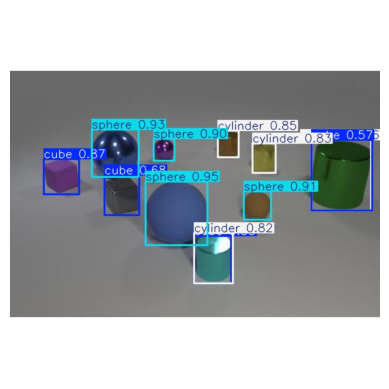

In [43]:
# Original YOLOv8 model
show_image("runs/detect/predict/CLEVR_Test.jpg")

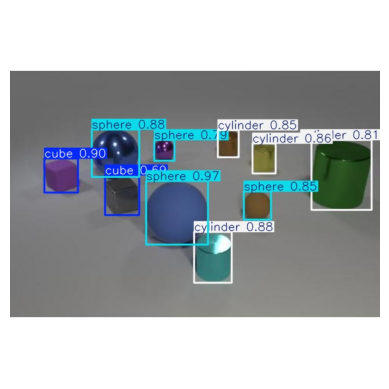

In [44]:
# Modified YOLOv8 MODIFY
show_image("runs/detect/predict2/CLEVR_Test.jpg")